In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline


### Data Wrangling

In [2]:
df=pd.read_csv('pisa2012xy.csv', encoding='latin-1')
df.head()

C:\Users\kayaf\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


### Data Assessment and Cleanning

In [3]:
df.shape

(485490, 636)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB


gender=['ST04Q01']
mother_highest_scool= ['ST13Q01']
math_score= ['PV1MATH']
reading_score =['PV1READ']
science_score= ['PV1SCIE'

In [5]:
df['ST04Q01'].isnull().sum()

0

In [7]:
df['PV1MATH'].isnull().sum()

0

In [9]:
df['PV1SCIE'].isnull().sum()

0

In [10]:
df['PV1READ'].isnull().sum()

0

In [12]:
df['ST13Q01'].isnull().sum()

27511

In [13]:
df['ST04Q01'].value_counts()

Female    245064
Male      240426
Name: ST04Q01, dtype: int64

In [22]:
keep_columns=['CNT','ST04Q01','ST13Q01','PV1MATH','PV1SCIE','PV1READ']


In [23]:
df_pisa= df[keep_columns]

In [24]:
df_pisa.head()

,CNT,ST04Q01,ST13Q01,PV1MATH,PV1SCIE,PV1READ
0,Albania,Female,<ISCED level 3A>,406.8469,341.7009,249.5762
1,Albania,Female,<ISCED level 3A>,486.1427,548.9929,406.2936
2,Albania,Female,"<ISCED level 3B, 3C>",533.2684,499.6643,401.2100
3,Albania,Female,"<ISCED level 3B, 3C>",412.2215,438.6796,547.3630
4,Albania,Female,She did not complete <ISCED level 1>,381.9209,361.5628,311.7707


In [25]:
df_pisa['ST13Q01'].unique()

array(['<ISCED level 3A> ', '<ISCED level 3B, 3C> ',
       'She did not complete <ISCED level 1> ', '<ISCED level 2> ',
       '<ISCED level 1> ', nan], dtype=object)

In [27]:
df_pisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   CNT      485490 non-null  object 
 1   ST04Q01  485490 non-null  object 
 2   ST13Q01  457979 non-null  object 
 3   PV1MATH  485490 non-null  float64
 4   PV1SCIE  485490 non-null  float64
 5   PV1READ  485490 non-null  float64
dtypes: float64(3), object(3)
memory usage: 22.2+ MB


### Data Exploration

In [28]:
df_pisa.describe()

,PV1MATH,PV1SCIE,PV1READ
count,485490.000000,485490.000000,485490.000000
mean,469.621653,475.769824,472.004640
std,103.265391,101.464426,102.505523
min,19.792800,2.648300,0.083400
25%,395.318600,404.457300,403.600700
50%,466.201900,475.699400,475.455000
75%,541.057800,547.780700,544.502500
max,962.229300,903.338300,904.802600


The students science mean score is higher than math and reading scores.

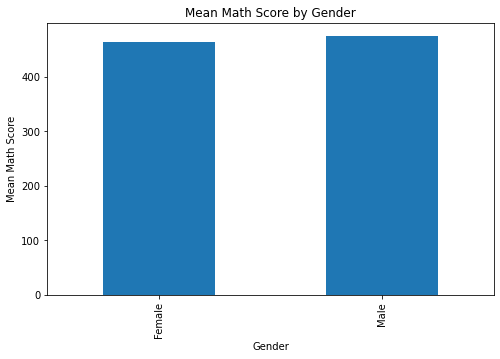

In [30]:
plt.figure(figsize=[8, 5])
df_pisa.groupby('ST04Q01').mean()['PV1MATH'].plot(kind='bar')
plt.title('Mean Math Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Math Score')
plt.show()

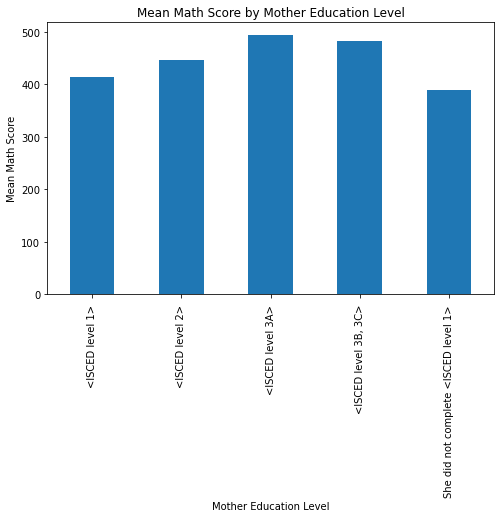

In [32]:
plt.figure(figsize=[8, 5])
df_pisa.groupby('ST13Q01').mean()['PV1MATH'].plot(kind='bar')
plt.title('Mean Math Score by Mother Education Level')
plt.xlabel('Mother Education Level')
plt.ylabel('Mean Math Score')
plt.show()

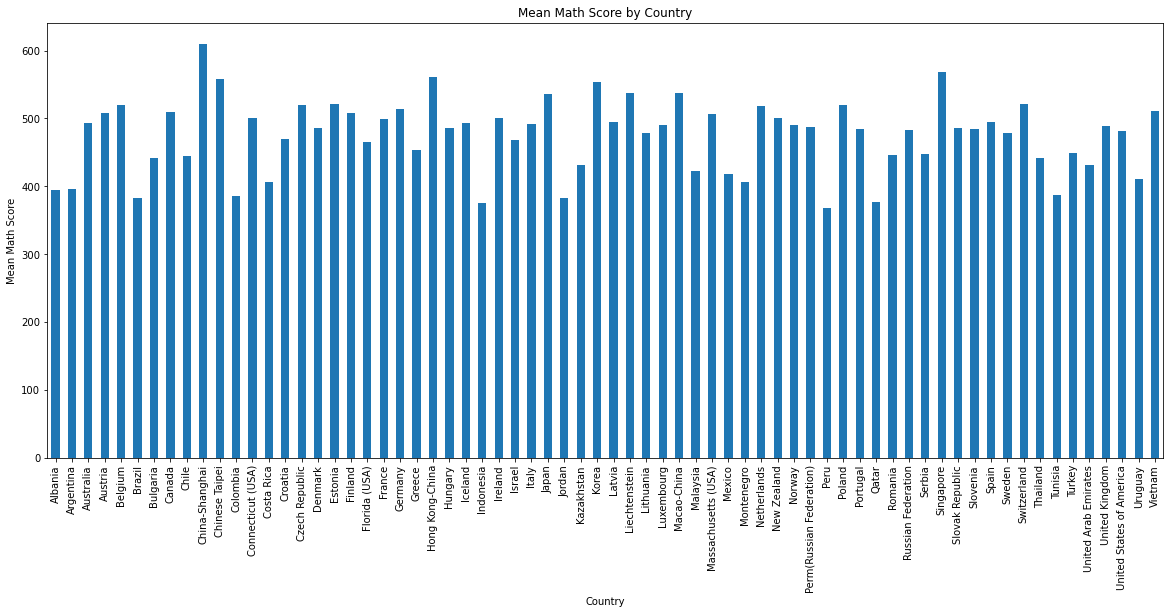

In [38]:
plt.figure(figsize=[20, 8])
df_pisa.groupby('CNT').mean()['PV1MATH'].plot(kind='bar')
plt.title('Mean Math Score by Country')
plt.xlabel('Country')
plt.ylabel('Mean Math Score')
plt.show()

1- Male students' mean math score is higher than female students' mean math score.
2- Students whose mother education level is 3A has a higher math mean score than the other students. 
3- Students who live in China has a higher mean math score than the students who live in the other countries.

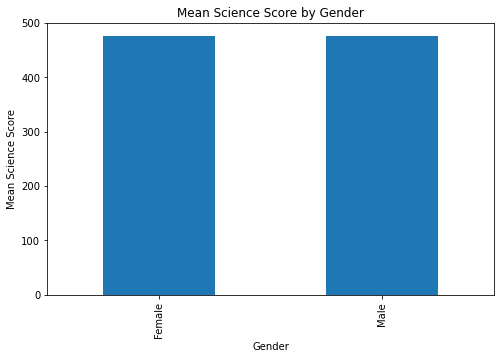

In [48]:
plt.figure(figsize=[8, 5])
df_pisa.groupby('ST04Q01').mean()['PV1SCIE'].plot(kind='bar')
plt.title('Mean Science Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Science Score')
plt.show()

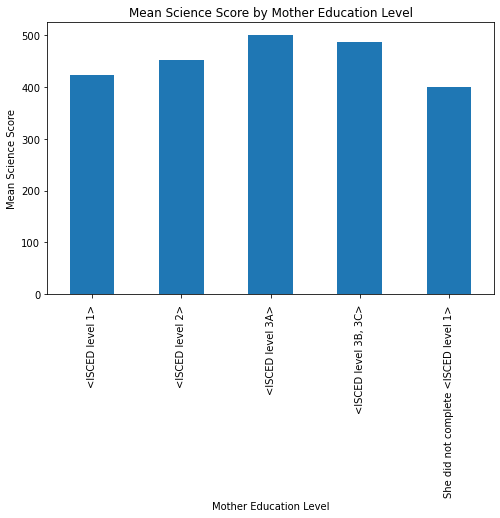

In [49]:
plt.figure(figsize=[8, 5])
df_pisa.groupby('ST13Q01').mean()['PV1SCIE'].plot(kind='bar')
plt.title('Mean Science Score by Mother Education Level')
plt.xlabel('Mother Education Level')
plt.ylabel('Mean Science Score')
plt.show()

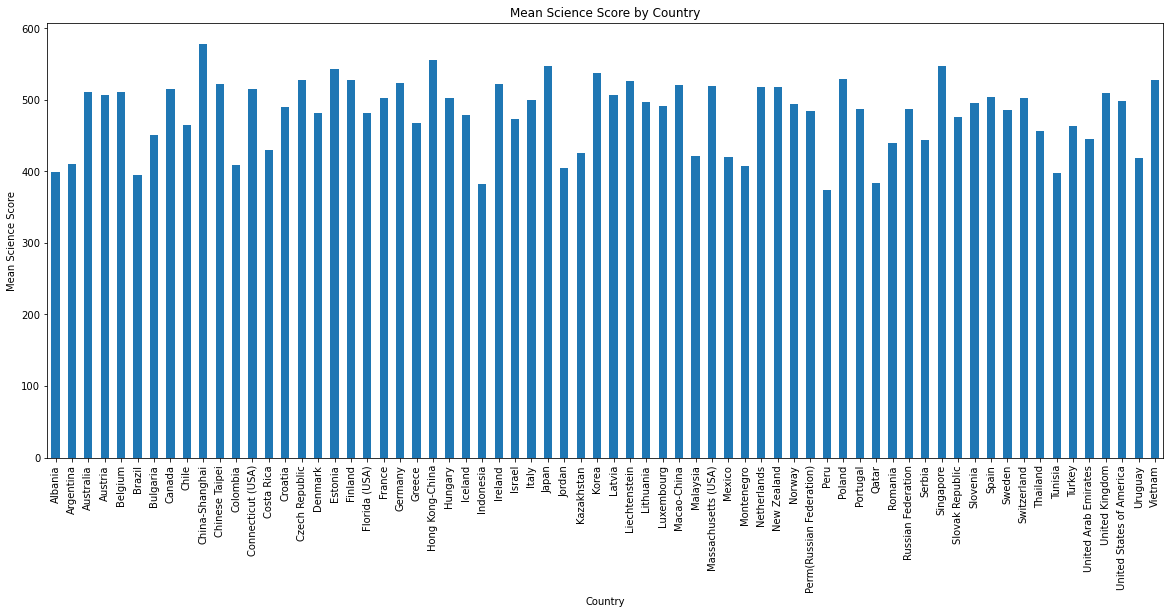

In [50]:
plt.figure(figsize=[20, 8])
df_pisa.groupby('CNT').mean()['PV1SCIE'].plot(kind='bar')
plt.title('Mean Science Score by Country')
plt.xlabel('Country')
plt.ylabel('Mean Science Score')
plt.show()

1- Male and female students' mean science score is almost same.
2- Students whose mother education level is 3A has a higher mean science score than the other students. 
3- Students who live in China-Shanghai has a higher mean math score than the students who live in the other countries.

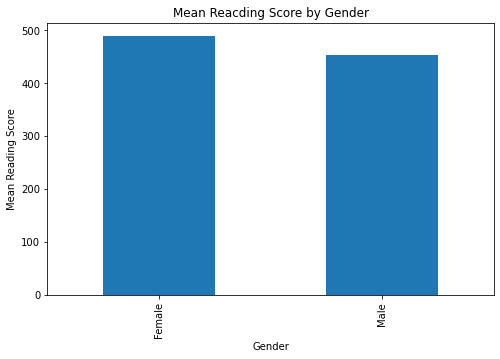

In [51]:
plt.figure(figsize=[8, 5])
df_pisa.groupby('ST04Q01').mean()['PV1READ'].plot(kind='bar')
plt.title('Mean Reacding Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Reading Score')
plt.show()

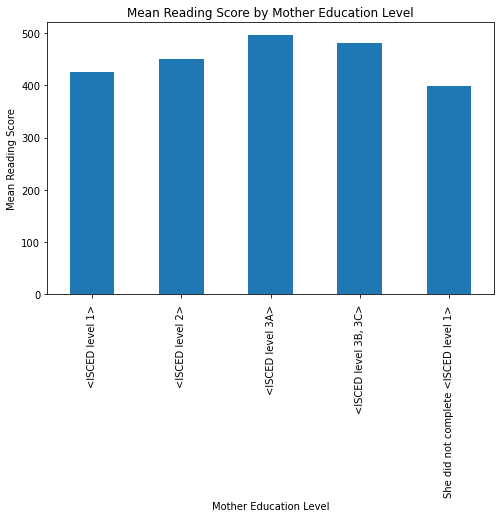

In [53]:
plt.figure(figsize=[8, 5])
df_pisa.groupby('ST13Q01').mean()['PV1READ'].plot(kind='bar')
plt.title('Mean Reading Score by Mother Education Level')
plt.xlabel('Mother Education Level')
plt.ylabel('Mean Reading Score')
plt.show()

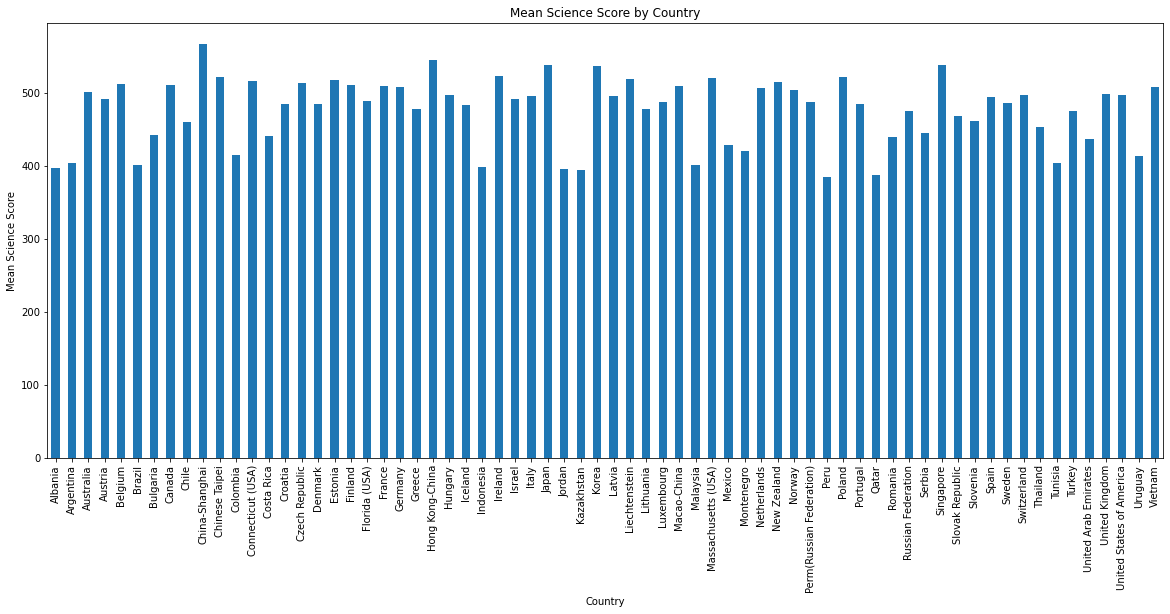

In [54]:
plt.figure(figsize=[20, 8])
df_pisa.groupby('CNT').mean()['PV1READ'].plot(kind='bar')
plt.title('Mean Science Score by Country')
plt.xlabel('Country')
plt.ylabel('Mean Science Score')
plt.show()

1- Female students' mean reading score is higher than male students' mean reading score.
2- Students whose mother education level is 3A has a higher mean reading score than the other students.
3- Students who live in China-Shanghai have a higher mean reading score than the students who live the other countries.

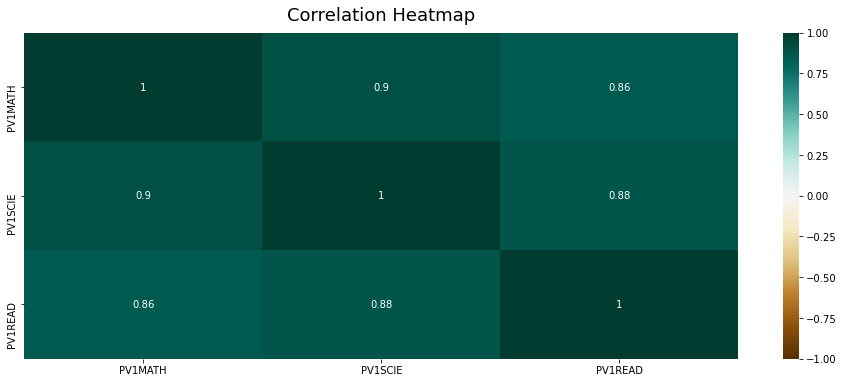

In [58]:
plt.figure(figsize=(16, 6))
heatmap = sb.heatmap(df_pisa.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

There is a high correlation between science and math (r=0.9) and science and reading (r=0.88), and math and reading (r=0.86).